**QUESTION 3**

Predicting Shopping Mall Sales. You will have to create a model to predict revenue. Identify the model with the best params. Target Column - Revenue. Please note: Visualisation is mandatory. You will receive 0 marks if you do not add visualisation.

Data Link - https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv

Importing Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv")

df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [ ]:
df.drop("Id",axis=1, inplace=True)

In [ ]:
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2.0,...,3.0,5,3,4,5,5,4,3,4,5653753
1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2.0,...,3.0,0,0,0,0,0,0,0,0,6923131
2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3.0,...,3.0,0,0,0,0,0,0,0,0,2055379
3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4.0,...,7.5,25,12,10,6,18,12,12,6,2675511
4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2.0,...,3.0,5,1,3,2,3,4,3,3,4316715


In [ ]:
df.shape

(137, 42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          133 non-null    float64
 10  P7          133 non-null    float64
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

From column Open date,we can get the established year

In [ ]:
df['Established Year'] = 2023 - df['Open Date'].str.split('/',expand=True)[2].apply(int)
df.drop('Open Date',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              137 non-null    object 
 1   City Group        137 non-null    object 
 2   Type              137 non-null    object 
 3   P1                137 non-null    int64  
 4   P2                137 non-null    float64
 5   P3                137 non-null    float64
 6   P4                137 non-null    float64
 7   P5                137 non-null    int64  
 8   P6                133 non-null    float64
 9   P7                133 non-null    float64
 10  P8                137 non-null    int64  
 11  P9                137 non-null    int64  
 12  P10               137 non-null    int64  
 13  P11               137 non-null    int64  
 14  P12               137 non-null    int64  
 15  P13               137 non-null    float64
 16  P14               137 non-null    int64  
 1

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(5)

P6      4
P7      4
City    0
P30     0
P22     0
dtype: int64

Column P6 & P7 has missing values, as dataset is alredy less & both the columns are not that import for our predictions, we can drop the columns.

In [ ]:
df.drop(['P6','P7'],axis=1,inplace=True)

Let's see their correaltions

In [ ]:
correlation = df.corr()
correlation

<ipython-input-20-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,P1,P2,P3,P4,P5,P8,P9,P10,P11,P12,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Established Year
P1,1.000000,0.836671,0.695928,0.677941,0.302820,0.760820,0.765743,0.795885,0.542735,0.708360,...,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.070217,0.083658
P2,0.836671,1.000000,0.473551,0.540322,0.203003,0.505116,0.481635,0.498135,0.442719,0.428065,...,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.191518,0.169950
P3,0.695928,0.473551,1.000000,0.443606,0.168891,0.689173,0.741967,0.764191,0.417752,0.684071,...,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.024613,0.014200
P4,0.677941,0.540322,0.443606,1.000000,0.715406,0.654594,0.675336,0.685416,0.585285,0.595115,...,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.035685,-0.019542
P5,0.302820,0.203003,0.168891,0.715406,1.000000,0.447577,0.465662,0.462299,0.435002,0.409181,...,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.028191,-0.116705
P8,0.760820,0.505116,0.689173,0.654594,0.447577,1.000000,0.919956,0.881650,0.230823,0.889829,...,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.084215,-0.040025
P9,0.765743,0.481635,0.741967,0.675336,0.465662,0.919956,1.000000,0.961266,0.398431,0.971593,...,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.050352,-0.076214
P10,0.795885,0.498135,0.764191,0.685416,0.462299,0.881650,0.961266,1.000000,0.479873,0.930453,...,0.514738,0.462235,0.549238,0.320317,0.601956,0.483010,0.565068,0.313748,-0.073220,-0.077591
P11,0.542735,0.442719,0.417752,0.585285,0.435002,0.230823,0.398431,0.479873,1.000000,0.315568,...,0.410573,0.300331,0.358379,0.244698,0.401866,0.291108,0.383485,0.158579,0.084247,0.100747
P12,0.708360,0.428065,0.684071,0.595115,0.409181,0.889829,0.971593,0.930453,0.315568,1.000000,...,0.433005,0.403691,0.471691,0.281619,0.519051,0.426274,0.491803,0.304963,-0.062193,-0.110173


<Axes: >

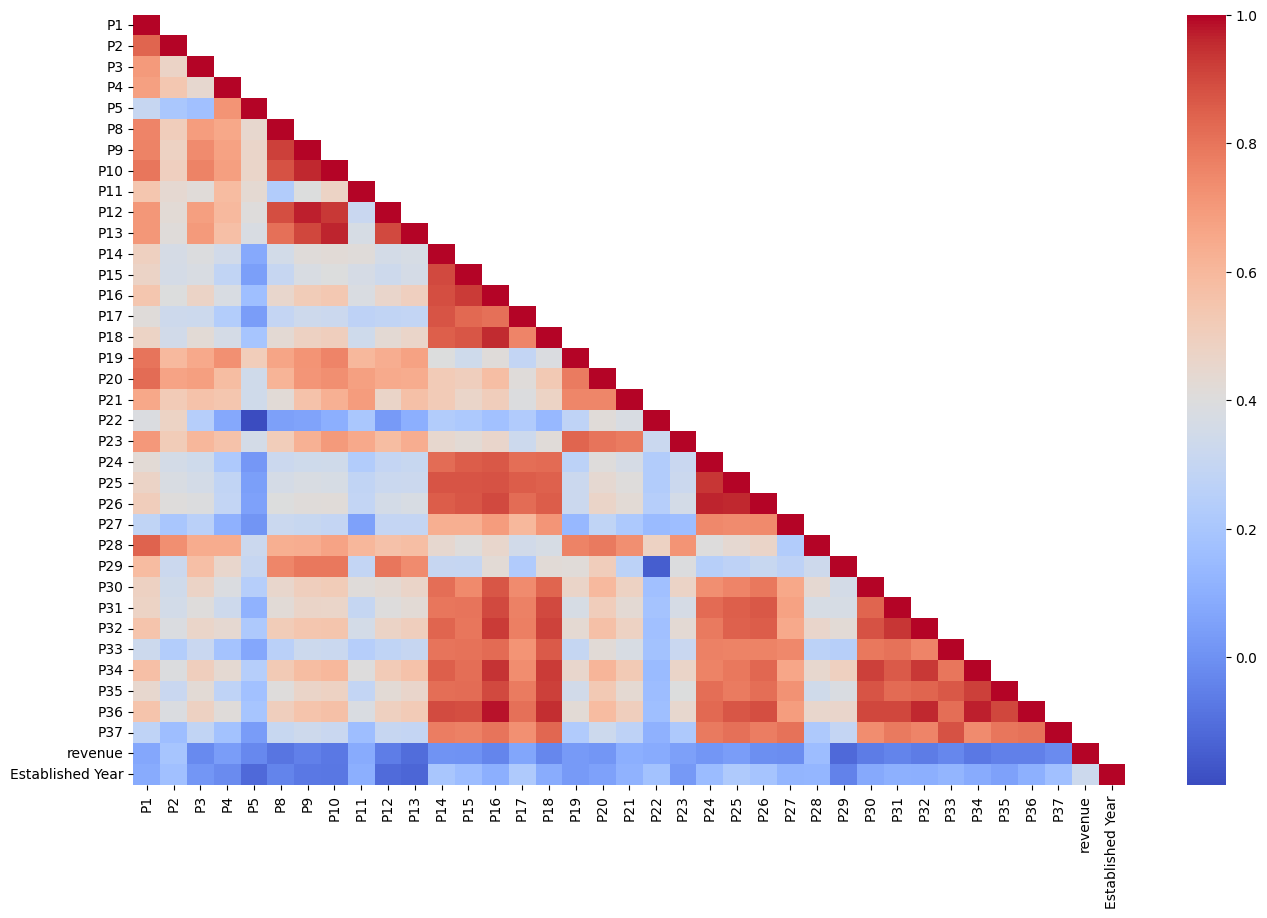

In [ ]:
plt.figure(figsize = (16,10))

mask = np.zeros_like(correlation) # to see the correalation value once
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(correlation, mask = mask, fmt='.2f', cmap='coolwarm')

In [ ]:
## Categorical data analysis
city_count = df['City'].nunique()
city_group_count = df['City Group'].nunique()
type_count = df['Type'].nunique()

print(f'No of distinct cities: {city_count}')
print(f'No of distinct city groups: {city_group_count}')
print(f'No of distinct types : {type_count}')

No of distinct cities: 34
No of distinct city groups: 2
No of distinct types : 3


Based on above information, we drop 'City' column as many of the cities have only one data point which doesn't really help us at all. The we analyse Sales Revenue based on 'City Group' and 'Type' columns.

In [ ]:
df.drop(['City'],axis=1,inplace=True)

<Axes: xlabel='City Group'>

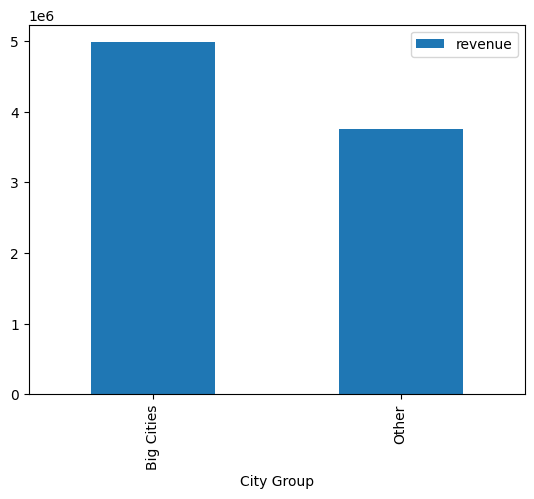

In [ ]:
df.groupby(['City Group']).agg({'revenue':'mean'}).plot(kind='bar')

As we can see here, Big Cities has higher revenue

<Axes: xlabel='Type'>

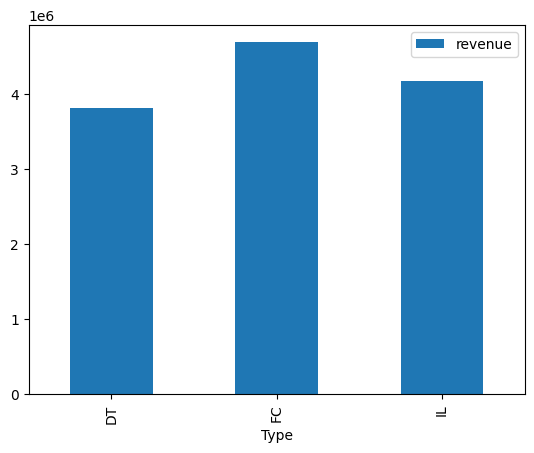

In [ ]:
df.groupby('Type').agg({'revenue':'mean'}).plot(kind='bar')

As we can see here, FC' has higher revenue followed by 'IL' and then 'DT'

<Axes: xlabel='City Group,Type'>

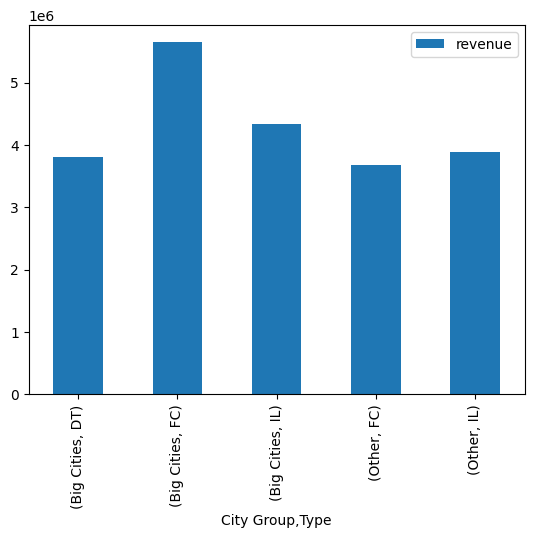

In [ ]:
df.groupby(['City Group','Type']).agg({'revenue':'mean'}).plot(kind='bar')

First of all, there s no type 'DT' in case of 'other' cities. And all types earn more revenue in 'big cities'. Therefore, we must involve these categorical variables as partof our model.

In [ ]:
type = pd.get_dummies(df['Type'],drop_first=True)
type

,FC,IL
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
132,1,0
133,1,0
134,1,0
135,1,0


In [ ]:
city=pd.get_dummies(df['City Group'])['Big Cities']
city

0      1
1      1
2      0
3      0
4      0
      ..
132    0
133    1
134    0
135    1
136    1
Name: Big Cities, Length: 137, dtype: uint8

In [ ]:
df=pd.concat([df,city,type],axis=1)
df.drop(['Type','City Group'],axis=1,inplace=True)

In [ ]:
df.sample(5)

,P1,P2,P3,P4,P5,P8,P9,P10,P11,P12,...,P33,P34,P35,P36,P37,revenue,Established Year,Big Cities,FC,IL
65,3,5.0,4.0,3.0,1,5,5,5,1,5,...,0,0,0,0,0,1756069,10,1,1,0
8,1,1.0,4.0,4.0,1,5,5,5,1,5,...,3,4,5,4,5,4952497,13,0,0,1
0,4,5.0,4.0,4.0,2,4,5,5,3,5,...,5,5,4,3,4,5653753,24,1,0,1
85,3,5.0,4.0,4.0,2,4,5,4,3,5,...,0,0,0,0,0,7495092,23,1,1,0
50,3,5.0,4.0,5.0,3,4,4,4,5,4,...,2,2,2,3,3,2156098,13,1,0,1


In [ ]:
target='revenue'
features=df.drop(target,axis=1).columns

X=df[features]
y=df[target]

In [ ]:
X.head()

,P1,P2,P3,P4,P5,P8,P9,P10,P11,P12,...,P32,P33,P34,P35,P36,P37,Established Year,Big Cities,FC,IL
0,4,5.0,4.0,4.0,2,4,5,5,3,5,...,4,5,5,4,3,4,24,1,0,1
1,4,5.0,4.0,4.0,1,5,5,5,1,5,...,0,0,0,0,0,0,15,1,1,0
2,2,4.0,2.0,5.0,2,5,5,5,2,5,...,0,0,0,0,0,0,10,0,0,1
3,6,4.5,6.0,6.0,4,8,10,10,8,10,...,10,6,18,12,12,6,11,0,0,1
4,3,4.0,3.0,4.0,2,5,5,5,2,5,...,3,2,3,4,3,3,14,0,0,1


In [ ]:
y.head()

0    5653753
1    6923131
2    2055379
3    2675511
4    4316715
Name: revenue, dtype: int64

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
print(f'feature training dataset shape: {X_train.shape}')
print(f'feature test dataset shape: {X_test.shape}')
print(f'output training dataset shape: {y_train.shape}')
print(f'output test dataset shape: {y_test.shape}')

feature training dataset shape: (109, 39)
feature test dataset shape: (28, 39)
output training dataset shape: (109,)
output test dataset shape: (28,)


In [ ]:
## Baseline
y_baseline=y_train.mean()
print('Baseline score = {}'.format(mean_absolute_error(y_train,([y_baseline]*len(y_train)))))

Baseline score = 1566761.9533709285


**MODELS**

1 . Linear Regression

In [ ]:
LR_model = LinearRegression()

In [ ]:
scores=[]
for i in range(1,40):
    rfe = RFE(LR_model, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    cols=X_train.columns[rfe.support_]
    X_train_temp=X_train[cols]
    X_test_temp=X_test[cols]
    LR_model.fit(X_train_temp,y_train)
    scores.append((i,mean_absolute_error(LR_model.predict(X_train_temp),y_train),mean_absolute_error(LR_model.predict(X_test_temp),y_test)))
scores.sort(key=lambda x: x[1])
scores

[(25, 1154609.8147644391, 2903153.029489544),
 (27, 1155534.9144407045, 2893675.64675811),
 (26, 1155669.3875204273, 2893517.95339635),
 (28, 1156252.869139665, 2887707.1967395446),
 (29, 1156939.0414165654, 2895282.0248783613),
 (24, 1156946.9855527992, 2888616.0232680487),
 (36, 1158813.4773167619, 2931822.7487903433),
 (38, 1158989.7321439828, 2953278.8551718434),
 (39, 1159027.7610926651, 2953257.897276573),
 (35, 1159213.2665033955, 2925249.1351496903),
 (37, 1159441.147898548, 2944165.527581978),
 (22, 1160700.33871152, 2821232.3129434674),
 (21, 1161064.3990561913, 2790902.563016006),
 (18, 1162562.6369550987, 2818740.6392313163),
 (23, 1162667.310079203, 2865953.2876249724),
 (33, 1165399.684730696, 2803604.5861776024),
 (34, 1165677.5563295847, 2863139.585037232),
 (30, 1166667.3877335596, 2813899.286596615),
 (32, 1167989.9845112087, 2819855.711495952),
 (19, 1171466.9443963699, 2820938.142227188),
 (17, 1173066.0804640176, 2802118.6442211764),
 (31, 1173336.1406441769, 28371

In [ ]:
rfe = RFE(LR_model, n_features_to_select=25)
rfe.fit(X_train, y_train)
cols=X_train.columns[rfe.support_]
X_train_temp=X_train[cols]
X_test_temp=X_test[cols]
LR_model.fit(X_train_temp,y_train)

LinearRegression()

In [ ]:
mean_absolute_error(LR_model.predict(X_test_temp),y_test)

2903153.029489544

2 . SVR

In [ ]:
print(f'feature training dataset shape: {X_train.shape}')
print(f'feature test dataset shape: {X_test.shape}')
print(f'output training dataset shape: {y_train.shape}')
print(f'output test dataset shape: {y_test.shape}')

feature training dataset shape: (109, 39)
feature test dataset shape: (28, 39)
output training dataset shape: (109,)
output test dataset shape: (28,)


In [ ]:
m2=Ridge()
scores=[]
for i in range(1,40):
    rfe = RFE(m2, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    cols=X_train.columns[rfe.support_]
    X_train_temp=X_train[cols]
    X_test_temp=X_test[cols]
    m2.fit(X_train_temp,y_train)
    scores.append((i,mean_absolute_error(m2.predict(X_train_temp),y_train),mean_absolute_error(m2.predict(X_test_temp),y_test)))
scores.sort(key=lambda x: x[1])
scores

[(26, 1147701.3543269064, 2795338.456305229),
 (28, 1147880.1316093076, 2795966.9942848203),
 (29, 1147962.9229709506, 2795834.6757664094),
 (25, 1147970.5507803694, 2804903.037325324),
 (27, 1148193.389820706, 2799568.0533120413),
 (18, 1152916.910048783, 2732572.39247671),
 (22, 1153778.04536969, 2748058.3554873876),
 (23, 1156446.3118121545, 2788315.039114025),
 (21, 1157323.553393227, 2718959.814667556),
 (24, 1157893.3206157887, 2785813.3057884825),
 (37, 1162022.4375703873, 2857112.1988944523),
 (39, 1162117.4631177403, 2864715.114175194),
 (38, 1162138.117562591, 2864495.8131526005),
 (19, 1163280.4632621268, 2748197.7558637606),
 (36, 1164192.6714438095, 2842536.8381261597),
 (17, 1164663.3504264497, 2735038.432903875),
 (35, 1164981.6760929064, 2841045.661779672),
 (16, 1165041.8226377233, 2672384.256728978),
 (20, 1165984.8557214409, 2746480.802599123),
 (34, 1176986.8574970555, 2776385.367153739),
 (33, 1177044.476029578, 2776400.166198514),
 (32, 1179190.830377815, 2716493.

In [ ]:
rfe = RFE(Ridge(), n_features_to_select=26)
rfe.fit(X_train, y_train)
cols=X_train.columns[rfe.support_]
X_train_temp=X_train[cols]
X_test_temp=X_test[cols]
m2.fit(X_train_temp,y_train)

Ridge()

In [ ]:
mean_absolute_error(m2.predict(X_test_temp),y_test)

2795338.456305229

3 . Decision Tree

In [ ]:
DT_model = DecisionTreeRegressor(random_state=42)

In [ ]:
params = {'max_depth': range(1, 25)}
params

{'max_depth': range(1, 25)}

In [ ]:
tree = GridSearchCV(DT_model, params, cv=5, verbose=True)
tree.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 25)}, verbose=True)

In [ ]:
mean_absolute_error(tree.predict(X_train),y_train)

1235712.5722921556

In [ ]:
mean_absolute_error(tree.predict(X_test),y_test)

1921042.6986434106

4 . Random Forest Regressor

In [ ]:
RFR_model = RandomForestRegressor()
RFR_model

RandomForestRegressor()

In [72]:
params={'n_estimators':range(10,100,10),'max_depth':range(10,21)}

In [ ]:
rf= GridSearchCV(RFR_model, params, cv=5, verbose=True)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(10, 21),
                         'n_estimators': range(10, 100, 10)},
             verbose=True)

In [ ]:
mean_absolute_error(rf.predict(X_train),y_train)

585152.6412844037

5 . Gradient Descent Regressor

In [ ]:
GDR_model = GradientBoostingRegressor()
GDR_model

GradientBoostingRegressor()

In [61]:
gb = GridSearchCV(GDR_model, params, cv=5, verbose=True)
gb.fit(X_train, y_train)

Fitting 5 folds for each of 693 candidates, totalling 3465 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': range(10, 21),
                         'n_estimators': range(10, 100, 10)},
             verbose=True)

In [64]:
params={'n_estimators':range(10,100,10),'max_depth':range(10,21),'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.4,0.5]}

In [63]:
mean_absolute_error(gb.predict(X_train),y_train)

1281465.4712254717

In [65]:
mean_absolute_error(gb.predict(X_test),y_test)

1890968.205302052

As we can see, Out of all the models used, Random Forest is giving best result.

In [66]:
gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=13, n_estimators=20)

In [67]:
best_model=GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)

In [68]:
best_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=20, n_estimators=20)

In [69]:
feat_imp=best_model.feature_importances_
features=X_train.columns
importances=pd.Series(feat_imp,index=features).sort_values()

<Axes: >

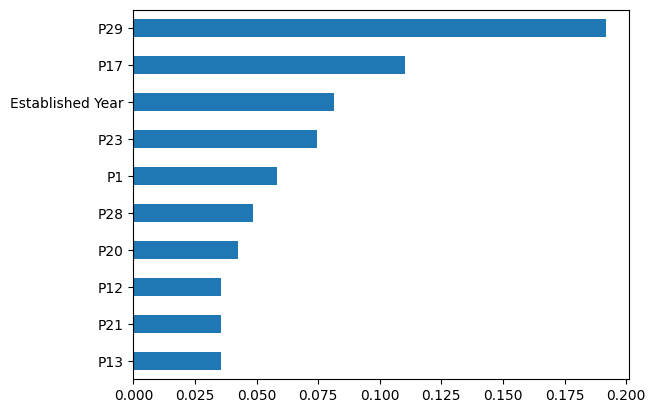

In [70]:
## best features
importances.tail(10).plot(kind='barh')